<a href="https://colab.research.google.com/github/SaraKarim23/-Pima-Indians-Diabetes-using-Decision-Tree-Algorithm-/blob/main/Decision_Tree_Algorithm_Pima_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context

This dataset comes from the Diabetes and Digestive and Kidney Disease National Institutes. The purpose of this dataset is to diagnose whether or not a patient is diabetic, on the basis of certain diagnostic measures in the dataset. The selection of these instances from a larger database was subject to several restrictions. All patients are women from the Indian heritage of Pima, at least 21 years old.



# **Description:**

Pregnancies Number of times pregnant

Glucose Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure Diastolic blood pressure (mm Hg)

SkinThickness Triceps skin fold thickness (mm)

Insulin 2-Hour serum insulin (mu U/ml)

BMI Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction Diabetes pedigree function

Age Age (years)

Outcome Class variable (0 or 1) 268 of 768 are 1, the others are 0





# Dataset source: https://www.kaggle.com/uciml/pima-indians-diabetes-database

## Imports and Loading Dataset

In [ ]:
import numpy as np
import pandas as pd

# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Dataset

In [ ]:

df = pd.read_csv('/content/drive/My Drive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df['Pregnancies'].unique()

array([ 6,  1,  8,  0,  5,  3, 10,  2,  4,  7,  9, 11, 13, 15, 17, 12, 14])

#  Data Cleaning

In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
df.isnull().sum()

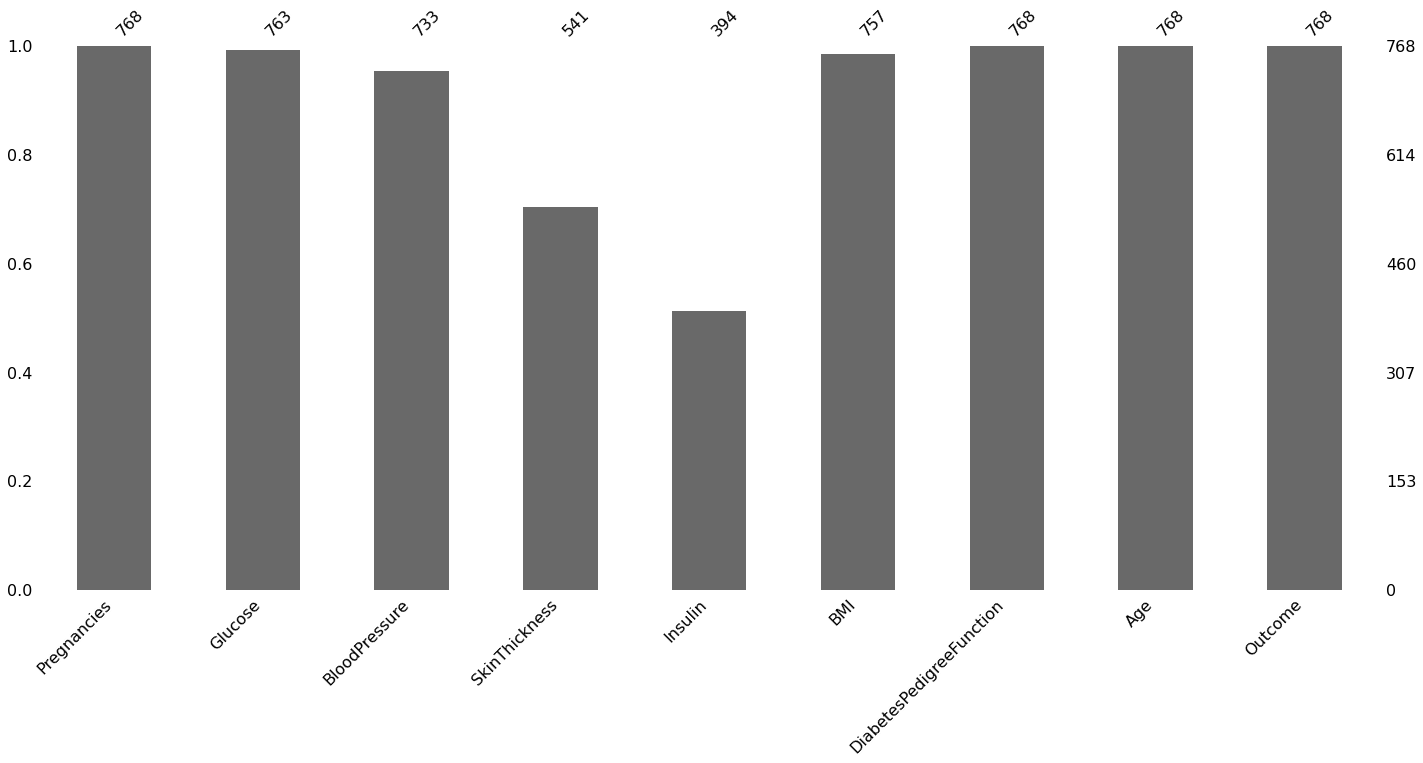

In [ ]:
import missingno as msno
p=msno.bar(df)

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
!pip install impyute

In [ ]:
#import sys
#from impyute.imputation.cs import fast_knn
#sys.setrecursionlimit(100000) #Increase the recursion limit of the OS

# start the KNN training
#imputed_training=fast_knn(df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].values, k=30)

In [ ]:
#df_t1 = pd.DataFrame(imputed_training,columns=['Glucose','BloodPressure','SkinThickness','Insulin','BMI'])

#df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df_t1[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]

In [ ]:
#df.isnull().sum()

In [ ]:
df.info()

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


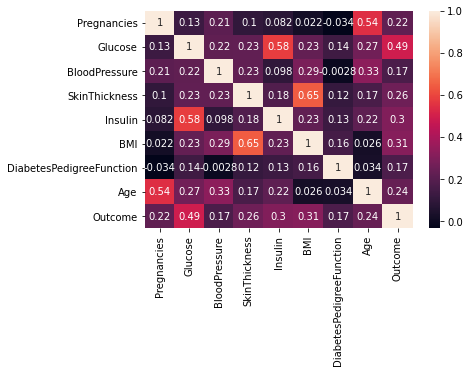

In [ ]:
sns.heatmap(df.corr(),annot=True)

Text(0.5, 1.0, 'Diabetes Patient')

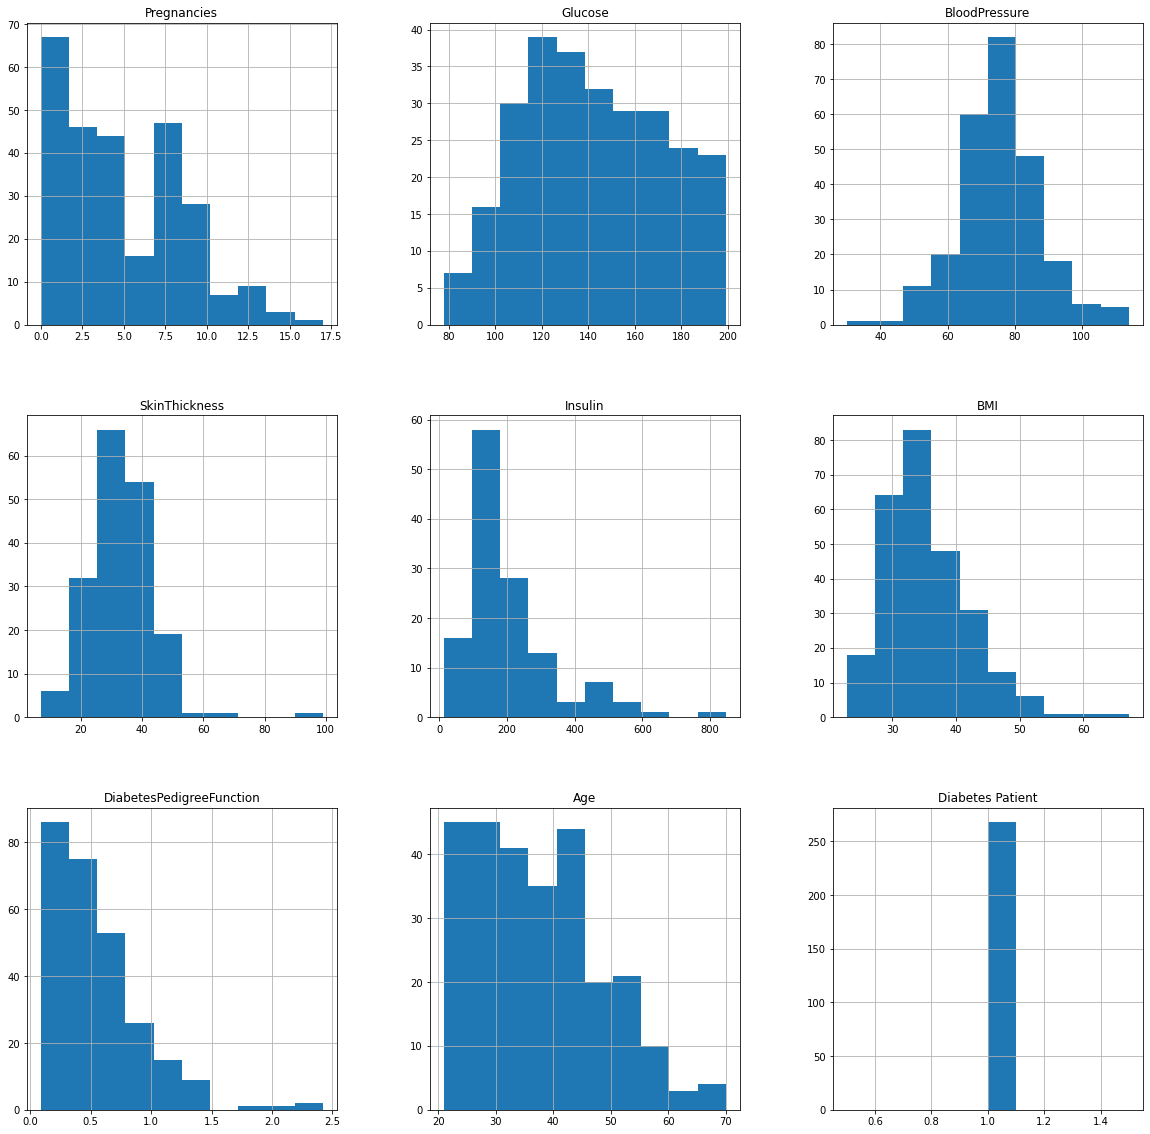

In [ ]:
p = df[df['Outcome']==1].hist(figsize = (20,20))
plt.title('Diabetes Patient')

# Import Libraries for Decision Tree Classifier

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics 

In [ ]:
df = pd.read_csv('/content/drive/My Drive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Spliting x axis and y axis

In [ ]:
x = df[['Pregnancies', 'Glucose','BloodPressure','SkinThickness','Insulin','BMI', 'DiabetesPedigreeFunction', 'Age' ]]
y = df['Outcome']

# Train and Test the data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0, shuffle=False  )

# Initializing Decision Tree

In [ ]:
clf = DecisionTreeClassifier(random_state=0)

In [ ]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [ ]:
print(clf.predict(x_test))

[1 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0
 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1
 0 0 0 0 1 0]


# Checking the Accuracy

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7467532467532467
